In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import math

Text(0, 0.5, 'Concentration (gm/100gm of mixed solvent)')

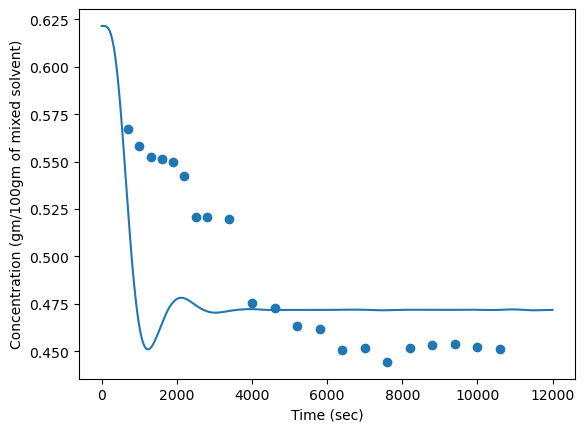

In [3]:
def generateODE9(t, m):
    # Unpack the variables from the y vector
    m00, m10, m01, m11, c = m

    Ci = 0.6215                     # gm/(100 gm of mixed solvent)
    Ce = 0.383                      # gm/(100 gm of mixed solvent)
    
    # Calculate necessary quantities
    A1= 0.001
    g1= 1.99744
    A2= 0.001
    g2= 0.88064
    kb= 4.9159
    b= 0.1172
    
    f = 5 * 10**-7                     # m3/sec 
    ρc = 1400 * 10**3                    # gm/m3
    h = 1 * 10**(-5)                     # m
    Vc = h * m11
    ρl = 785 * 10**3                     # gm/m3
    V = 0.0002
    tau = V / f
    
    delta_c = max(c - Ce, 0)
    s = delta_c / Ce
    
    Gl = A1 * (s)**g1
    Gw = A2 * (s)**g2
    B = kb * (s)**b

    dm00 = B - (m00 / tau)
    dm10 = (Gl * m00) - (m10 / tau)
    dm01 = (Gw * m00) - (m01 / tau)
    dm11 = (Gl * m10) + (Gw * m01) - (m11 / tau)
    dc = (Ci / tau) - (c / tau) - (ρc / ρl) * Vc
    
        
    return [dm00, dm10, dm01, dm11, dc]
t_span9 = (0, 12000)  # Adjust this to match the maximum time in your data
num_points9 = 12000
initialConditions9 = [0, 0, 0, 0, 0.6215]
sol9 = solve_ivp(
    lambda t, m: generateODE9(t, m),
    t_span9,
    initialConditions9,
    t_eval=np.linspace(t_span9[0], t_span9[1], num_points9)
)
Time9=[700, 1000, 1300, 1600, 1900, 2200, 2500, 2800, 3400, 4000, 4600, 5200, 5800, 6400, 7000, 7600, 8200, 8800, 9400, 10000, 10600]
Concentration9=[0.567100911,0.55806661,0.552402276,0.551438362,0.549870445,0.542640664,0.520739187,0.520630394,0.519500363,0.475518394,0.472627019,0.463479808,0.46155871,0.450828366,0.451514849,0.444370262,0.451795351,0.453523969,0.453676045,0.452259622,0.451143698]
plt.scatter(Time9, Concentration9)
plt.plot(sol9.t,sol9.y[4])
plt.xlabel("Time (sec)")
plt.ylabel("Concentration (gm/100gm of mixed solvent)")